In [1]:
from keras.datasets import mnist

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

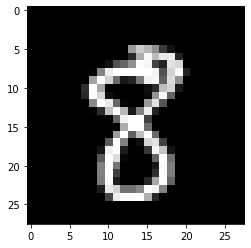

In [20]:
plt.imshow(x_train[46], cmap='gray')

In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
x_train = x_train/255    # (x - xmin) / (xmax - xmin)
x_test = x_test/255

### build the neural Network

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [38]:
model = Sequential()

model.add(Conv2D(filters=32,input_shape =(28,28,1), kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation= 'relu' ))
model.add(Dense(10, activation='softmax'))


In [39]:
model.summary();

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_7 (Dense)             (None, 512)              

In [40]:
model.compile(loss='sparse_categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [41]:
model.fit(x_train,y_train, batch_size=10, epochs=10)

Epoch 1/10


6000/6000 [==============================] - 62s 10ms/step - loss: 2.3015 - accuracy: 0.1114
Epoch 2/10
6000/6000 [==============================] - 55s 9ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/10
6000/6000 [==============================] - 58s 10ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 4/10
6000/6000 [==============================] - 60s 10ms/step - loss: 2.3014 - accuracy: 0.1120
Epoch 5/10
6000/6000 [==============================] - 60s 10ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 6/10
6000/6000 [==============================] - 60s 10ms/step - loss: 2.3015 - accuracy: 0.1121
Epoch 7/10
6000/6000 [==============================] - 63s 10ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 8/10
6000/6000 [==============================] - 62s 10ms/step - loss: 2.3014 - accuracy: 0.1120
Epoch 9/10
6000/6000 [==============================] - 63s 11ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 10/10
6000/6000 [==============================] - 62s 10

## Evaluate on test data`

In [42]:
model.evaluate(x_test,y_test, batch_size=1)

10000/10000 [==============================] - 41s 4ms/step - loss: 2.3016 - accuracy: 0.1135


[2.30159854888916, 0.11349999904632568]